In [ ]:
!unzip Booking_Jobs_All_220218.csv.zip

Archive:  Booking_Jobs_All_220218.csv.zip
  inflating: Booking_Jobs_All_220218.csv  


In [ ]:

!pip install contractions
!pip install rake-nltk
!pip install umap-learn
!pip install wordcloud
!pip install yake


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import contractions
import seaborn as sns
import spacy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
from tqdm import tqdm
from collections import defaultdict
import umap
import yake
import nltk
import numpy as np

In [ ]:
# yake_extractor = yake.KeywordExtractor()

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
df=pd.read_csv("Booking_Jobs_All_220218.csv")
nlp = spacy.load('en_core_web_sm')

In [ ]:
df["length"]=df["Job Description"].str.len()

<ipython-input-18-fcc9d2dd8673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["length"])


<Axes: xlabel='length', ylabel='Density'>

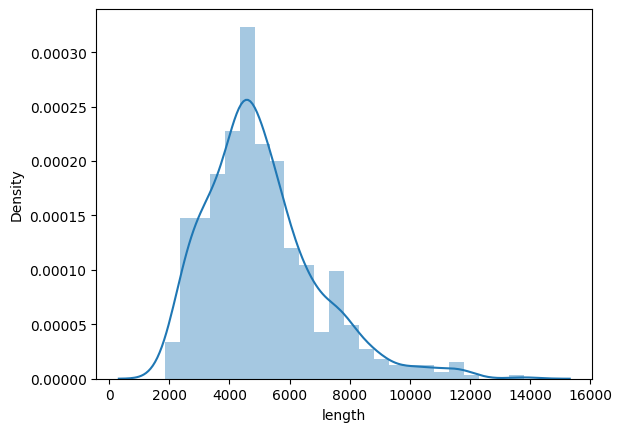

In [ ]:
sns.distplot(df["length"])

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def clean_text(text):
    # Remove numbers, .com, and hyperlinks
    text= contractions.fix(text)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\b\w+\.com\b', '', text)  # Remove .com URLs
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove hyperlinks
    # Remove special characters and extra spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # words = nltk.word_tokenize(text)
    # pos_tags = pos_tag(words)
    # processed_words = [
    #     lemmatizer.lemmatize(word, get_wordnet_pos(tag)).lower()
    #     for word, tag in pos_tags
    #     if word.lower() not in stop_words  # Remove stopwords
    # ]
    doc=nlp(text)

    filtered_words = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(filtered_words)

In [ ]:
df_train=pd.DataFrame()
df_train["Job Description"]=df["Job Description"].apply(lambda x: clean_text(x))

In [ ]:
df_train.head(3)

,Job Description
0,long ago book trip Eiffel Tower stroll New Y...
1,datum drive decision Technology core innovatio...
2,s global treasury team look Treasury risk ma...


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings=model.encode(list(df_train["Job Description"]))

In [ ]:
# gmm = GaussianMixture(n_components=653, random_state=42)

In [ ]:
# gmm.fit(embeddings)

In [ ]:
# labels = gmm.predict(embeddings)

In [ ]:
# sil_score = silhouette_score(embeddings, labels)

In [ ]:
# print(sil_score)

In [ ]:
umap_model = umap.UMAP(n_components=64, random_state=42)

In [ ]:
X_umap =umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
# plt.colorbar(scatter, label='Cluster')
# plt.title('UMAP Visualization of KMeans Clusters')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(X_umap[:, 10], X_umap[:, 11], c=kmeans.labels_, cmap='viridis', s=50)
# plt.colorbar(scatter, label='Cluster')
# plt.title('UMAP Visualization of KMeans Clusters')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

100%|██████████| 48/48 [00:08<00:00,  5.45it/s]


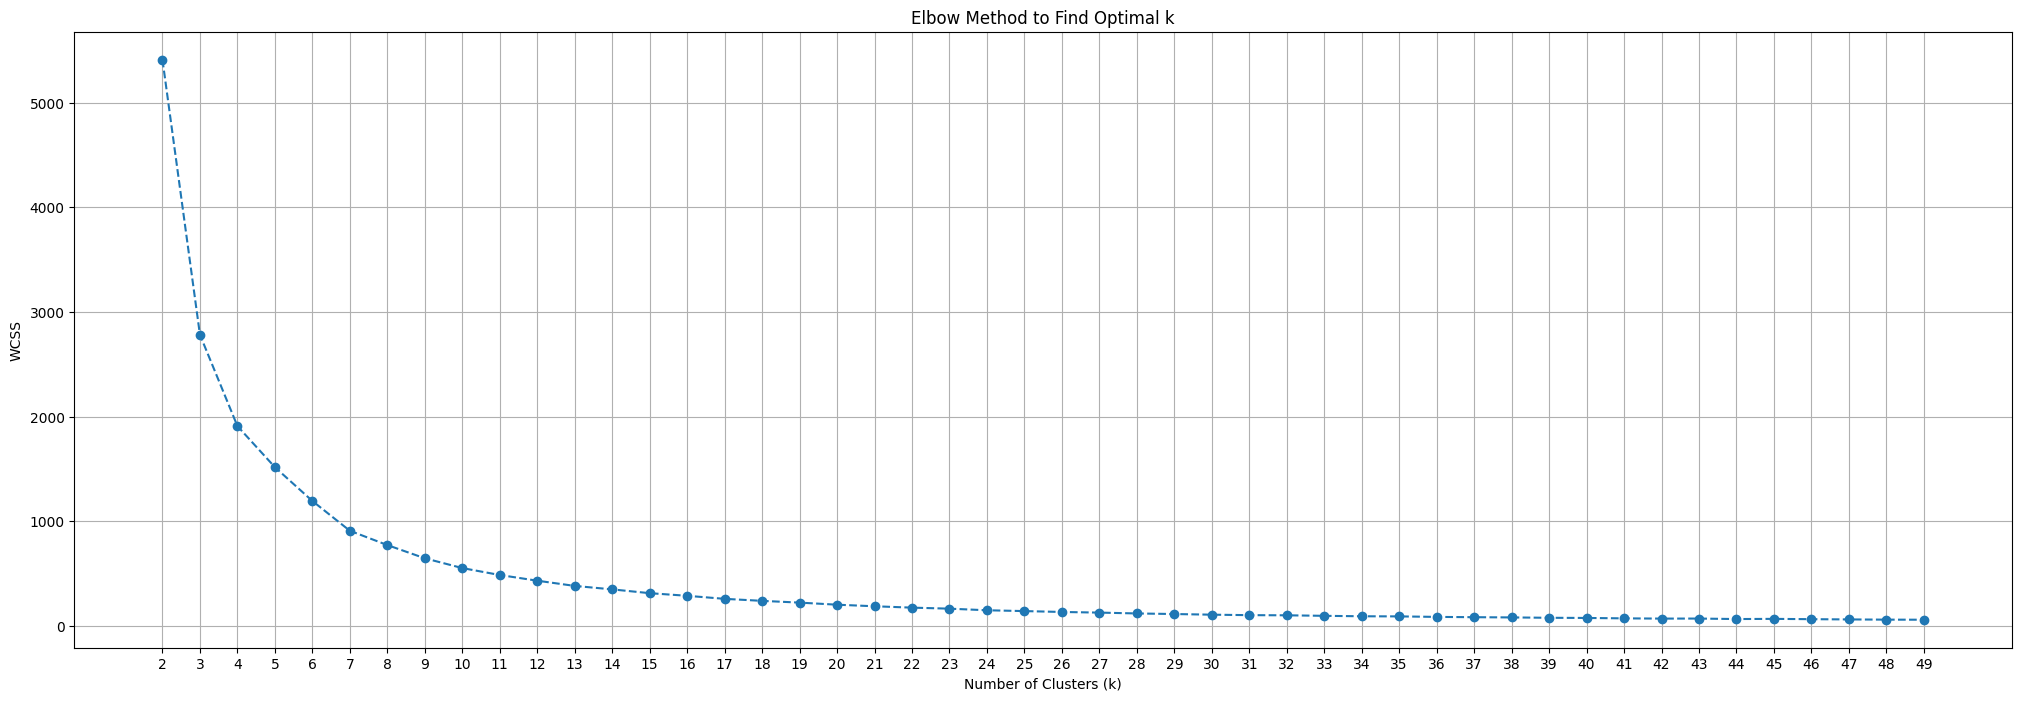

In [ ]:
wcss=[]
sil_scores=[]
k_values = range(2, 50)
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(X_umap)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS


# Plot the elbow curve
plt.figure(figsize=(25, 8))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=12, init='k-means++', max_iter=100, n_init=10, random_state=42)
kmeans2.fit(X_umap)

KMeans(max_iter=100, n_clusters=12, n_init=10, random_state=42)

In [ ]:
job_labels=kmeans2.labels_

In [ ]:
tfidf=TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, min_df=4
                      )

In [ ]:
feature_matrix=tfidf.fit_transform(df_train["Job Description"]).toarray()

In [ ]:
ngram_feature_train=tfidf.get_feature_names_out()

In [ ]:
X_umap.shape

(653, 64)

In [ ]:
all_keywords=[]
for idx,i in tqdm(enumerate(list(df_train["Job Description"]))):
  # print(idx)
  temp_keywords={}
  row = feature_matrix[idx]
  # print(row.nonzero())
  indices = row.nonzero()
  all_feature_word=[]
  for ind in indices:
    all_feature_word.append(ngram_feature_train[ind].tolist())
  # print(type(all_feature_word))


  for ngramword in list(all_feature_word[0]):
    # print(ngramword)
    embed=model.encode([ngramword])
    exmbed_x=umap_model.transform(embed.reshape(1,-1))
    # print(X_umap[idx].reshape(1,-1).shape)
    # print(exmbed_x.reshape(1,-1).shape)
    # print(f"sim idx {idx}")
    sim=cosine_similarity(X_umap[idx].reshape(1,-1),exmbed_x)
    # print(sim)
    # print(j)
    temp_keywords[ngramword]=sim[0][0]

  all_keywords.append(temp_keywords)




653it [1:01:47,  5.68s/it]


In [ ]:
topk=10
cluster_imp_key={}
for data,lbl in zip(all_keywords,job_labels):
  keywords=sorted(data.items(), key=lambda x: x[1], reverse=True)[:topk]
  cluster_imp_key[lbl]=keywords



In [ ]:
cluster_imp_key

{1: [('iconic', 0.9999577),
  ('tower', 0.999948),
  ('resolve', 0.99994445),
  ('explore', 0.9999353),
  ('ago book', 0.99993515),
  ('end user', 0.99992347),
  ('discover people', 0.99992275),
  ('wait ready', 0.99992245),
  ('long ago', 0.9999211),
  ('away', 0.99991906)]}

In [ ]:
# def plot_wordcloud(cluster_num, word_scores):
#   wordcloud=WordCloud(background_color='white').generate_from_frequencies(word_scores)
#   plt.figure(figsize=(8,2))
#   plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
# for clustidx in cluster_imp_key:
#   plot_wordcloud(clustidx, cluster_imp_key[clustidx])

AttributeError: 'list' object has no attribute 'items'

In [ ]:
# test_tfid=tfidf.transform(["looking for job in ml"])
# for i, sentence in enumerate(["looking for job in ml"]):
#     print(f"\nSentence {i + 1}: '{sentence}'")
#     print("N-grams and their TF-IDF values:")

#     # Get non-zero n-grams and their values
#     row = test_tfid[i]
#     indices = row.nonzero()[1]  # Non-zero feature indices
#     for idx in indices:
#         print(f"  {ngram_feature_train[idx]}: {row[0, idx]:.4f}")



Sentence 1: 'looking for job in ml'
N-grams and their TF-IDF values:
  in: 0.8049
  job: 0.2656
  ml: 0.5306


In [ ]:
import joblib
joblib.dump(kmeans,"kmeans.pkl")
joblib.dump(tfidf,"tfidf.pkl")
joblib.dump(umap_model,"umap.pkl")

['umap.pkl']

In [ ]:
import joblib
class KeywordExtractionTesting():
  def __init__(self,kmeanmod,tfidfmodel,umap_model):
    self.kmeans=joblib.load(kmeanmod)
    self.tfidf=joblib.load(tfidfmodel)
    self.nlp=spacy.load('en_core_web_sm')
    self.model = SentenceTransformer("all-MiniLM-L6-v2")
    self.umap=joblib.load(umap_model)
    self.ngram_feature=self.tfidf.get_feature_names_out()
  def clean_text(self,text):
    # Remove numbers, .com, and hyperlinks
    text= contractions.fix(text)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\b\w+\.com\b', '', text)  # Remove .com URLs
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove hyperlinks
    # Remove special characters and extra spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # words = nltk.word_tokenize(text)
    # pos_tags = pos_tag(words)
    # processed_words = [
    #     lemmatizer.lemmatize(word, get_wordnet_pos(tag)).lower()
    #     for word, tag in pos_tags
    #     if word.lower() not in stop_words  # Remove stopwords
    # ]
    doc=self.nlp(text)
    filtered_words = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(filtered_words)
  def get_top_n(self,all_keywords,labels,topk):
    topk=topk
    cluster_imp_key={}
    for data,lbl in zip(all_keywords,job_labels):
      keywords=sorted(data.items(), key=lambda x: x[1], reverse=True)[:topk]
      cluster_imp_key[lbl]=keywords
    return cluster_imp_key
  def process(self,text):
    resultant_ngram={}
    processed_text=self.clean_text(text)
    embed=self.model.encode([processed_text])
    embed_comp=self.umap.transform(embed.reshape(1,-1))
    label=self.kmeans.predict(embed_comp)
    tfidffeature=self.tfidf.transform([processed_text])
    row=tfidffeature[0]
    indices=row.nonzero()
    feature_words=[]
    for idx in indices:
      feature_words.append(self.ngram_feature[idx])
    for ngramword in feature_words[0]:
      embed_word=self.umap.transform(self.model.encode([ngramword]).reshape(1,-1))
      sim=cosine_similarity(embed_comp.reshape(1,-1),embed_word)
      resultant_ngram[ngramword]=sim[0][0]

    impkeys=self.get_top_n(resultant_ngram,label)
    return impkeys








In [ ]:
from fastapi import FastAPI, Request,Response
from pydantic import BaseModel
from
model=KeywordExtractionTesting("kmeans.pkl","tfidf.pkl","umap.pkl")
class KeywordExtraction(BaseModel):
    text: str

async def exctract_keyword(data:KeywordExtraction):
  text=data.text
  keywords=model.process(text)
  return JSONResponse(content={"keyword":keywords})

